# 2024 Qiskit Fall Fest at Korea University

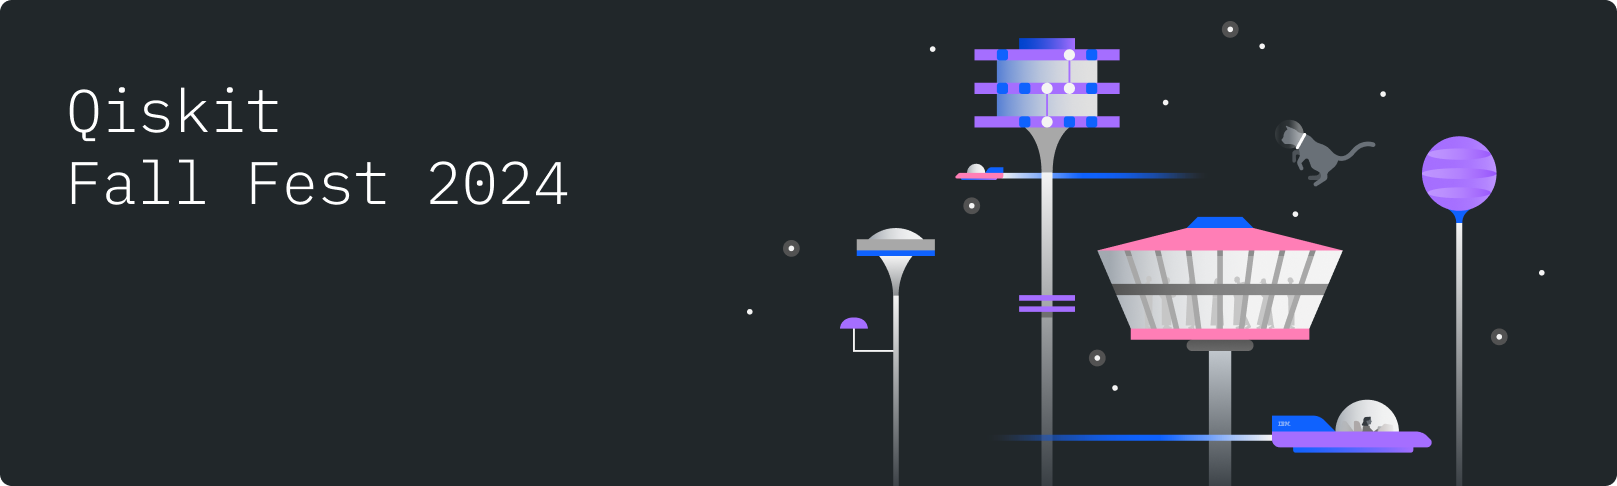

# Challenge 4: Classical Feedforward and Control Flow

## Part 0: Set up and Import the required packages

In [1]:
# If you use Colab, uncomment below line and run this cell
# %pip install git+https://github.com/goseumdochy/qiskit-fall-fest-2024ku-challenge-grader.git

In [1]:
### Import the required packages

import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### IBM Quantum API token ÏùÑ Ï†ÄÏû•ÌïòÍ∏∞

1. [IBM Quantum Platform](https://quantum.ibm.com/) Ïóê Ï†ëÏÜçÌïòÏó¨ Î°úÍ∑∏Ïù∏ ÌïòÍ∏∞
2. Ïö∞Ï∏° ÏÉÅÎã®Ïùò API token Î≥µÏÇ¨ÌïòÍ∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ÌïòÍ∏∞(ÏúÑÏùò Í∑∏Î¶º Ï∞∏Í≥†)
3. ÏïÑÎûòÏùò ÏΩîÎìúÏÖÄÏóêÏÑú `Your_token_here` Î∂ÄÎ∂ÑÏùÑ Ïó¨Îü¨Î∂ÑÏùò API tokenÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞
4. Ïó¨Îü¨Î∂ÑÏùò API tokenÏùÄ ÏåçÎî∞Ïò¥Ìëú ÏïàÏóê ÏûàÏñ¥ÏïºÌï©ÎãàÎã§!!

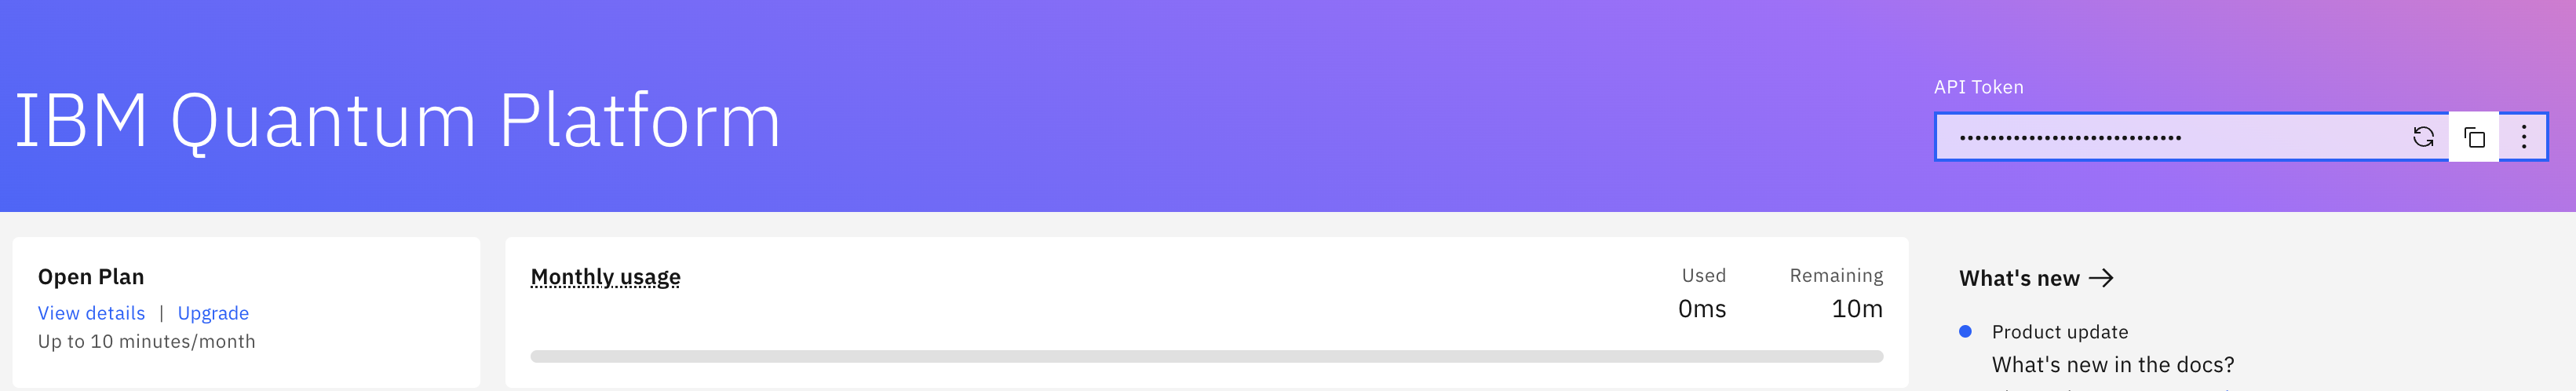

In [4]:
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="Your_token_here",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

### Ï†ïÎ≥¥ Í∏∞ÏûÖÌïòÍ∏∞

Í∏∞ÏûÖÌï¥Ï§Ä Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú ÏÑúÎ≤ÑÏóê Ï∞∏Í∞ÄÏûê ÏãùÎ≥ÑÏù¥ ÎêòÏò§Îãà, ÌäπÌûà ÌïôÎ≤à(student_id)ÏùÄ Ï†ïÌôïÌïòÍ≤å Í∏∞ÏûÖÌï¥Ï£ºÏãúÍ∏∏ Î∞îÎûçÎãàÎã§!

In [2]:
event = "2024 Qiskit Fall Fest at Korea University"

## Write your code below here. Delete the current information and replace it with your own ##
## Make sure to write your information between the quotation marks!

username = "ndtqiv"

major = "Electrical Engineering"

student_id = "202017xxxx"

## Now press the "Run" button in the toolbar above, or press Shift + Enter while you're active in this cell

## Part 1: Intro To Classical feedforward and control flow

Qiskit ÍµêÏú°ÏûêÎ£åÏù∏ [Qiskit textbook](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits)ÏóêÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÎßêÏù¥ ÏûàÏäµÎãàÎã§.
>_"A quantum circuit is a computational routine consisting of coherent quantum operations on qubits ... It is an ordered sequence of quantum gates, measurements and resets, all of which may be conditioned on and use data from the real-time classical computation."_

ÏúÑ Î¨∏Íµ¨Î•º ÌïúÍµ≠ÎßêÎ°ú ÏßÅÌï¥ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
>_ÏñëÏûê ÌöåÎ°úÎäî qubitÏóê ÎåÄÌïú ÏùºÍ¥ÄÏÑ± ÏûàÎäî ÏñëÏûê Ïó∞ÏÇ∞ÏúºÎ°ú Íµ¨ÏÑ±Îêú Í≥ÑÏÇ∞ Î£®Ìã¥ÏûÖÎãàÎã§ ... ÏñëÏûê gate, Ï∏°Ï†ï Î∞è Î¶¨ÏÖãÏùò ÏàúÏÑúÎåÄÎ°ú ÎÇòÏó¥ÎêòÎäî Í≤ÉÏù¥Î©∞, Ïù¥ Î™®Îì† Í≤ÉÏùÄ Ïã§ÏãúÍ∞Ñ Í≥†Ï†Ñ Ïª¥Ìì®ÌåÖ Í≥ÑÏÇ∞Ïùò Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ï°∞Í±¥ÌôîÎêòÏñ¥ ÏÇ¨Ïö©Îê† Ïàò ÏûàÏäµÎãàÎã§._

Ïù∏Ïö©Íµ¨Ïùò ÎßàÏßÄÎßâ Î¨∏Ïû•Ïù¥ Ïûò Ïù¥Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÏúºÏã§ Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∑∏ Î¨∏Ïû•Ïù¥ classicial feedforward and control forward(dynamic circuit Ïù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶º)ÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêú ÎÇ¥Ïö©ÏûÖÎãàÎã§. Î≥ÑÎã§Î•∏ ÏàòÏãùÏñ¥ ÏóÜÏù¥ ÏñëÏûê ÌöåÎ°úÎùºÍ≥† ÎßêÌïòÎ©¥ Î≥¥ÌÜµ _static_ ÏñëÏûê ÌöåÎ°úÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Ï†Ñ Ï±åÎ¶∞ÏßÄÏóêÏÑú Î¥§Îçò Í≤ÉÎì§ÏùÄ Ï†ÑÎ∂Ä static ÏñëÏûê ÌöåÎ°úÏûÖÎãàÎã§. Í∑∏Îü¨Îã§Î©¥ dynamic circuitsÏùÄ Î¨¥ÏóáÏùºÍπåÏöî?

ÏßÄÍ∏àÍπåÏßÄ Ïó¨Îü¨Î∂ÑÏù¥ Ï±åÎ¶∞ÏßÄÏóêÏÑú Î¥êÏôîÎçò ÏñëÏûê ÌöåÎ°úÎì§ÏùÄ Ï†ÑÎ∂Ä $|0\rangle$ ÏÉÅÌÉúÏóêÏÑú ÏãúÏûëÌïòÏó¨, ÏñëÏûê gateÎì§ÏùÑ Í∞ÄÌïòÍ≥†, ÎßàÏßÄÎßâÏóê Ï∏°Ï†ïÏùÑ ÌïòÎäî Î∞©ÏãùÏù¥ÏóàÏäµÎãàÎã§. Î∞òÎ©¥Ïóê **Dynamic circuits**ÏùÄ ÏñëÏûê ÌöåÎ°ú Ï§ëÍ∞ÑÏóê Ï∏°Ï†ïÏùÑ ÌïòÏó¨, Í∑∏ Ï∏°Ï†ï Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÌõÑÎ∞òÎ∂Ä ÏñëÏûê gate Î•º Ïñ¥ÎñªÍ≤å Í∞ÄÌï†ÏßÄ Í≤∞Ï†ïÌïòÎäî ÏñëÏûê ÌöåÎ°úÏûÖÎãàÎã§. Ïù¥Îü¨Ìïú Ï∏°Ï†ï Í≤∞Í≥ºÎäî ÎãπÏó∞ÌïòÍ≤åÎèÑ Ï§ëÏ≤© Í∞ôÏùÄ ÏÑ±ÏßàÏù¥ ÏóÜÎäî Í≥†Ï†ÑÏ†ÅÏù∏ Í∞íÏù¥Î©∞, Ïù¥Îü¨Ìïú Í≥†Ï†ÑÏ†ÅÏù∏ Ï∏°Ï†ï Í≤∞Í≥ºÏóê Îî∞Îùº Ïù¥ÌõÑÏùò ÏñëÏûê Ïó∞ÏÇ∞ÏùÑ Ï°∞Í±¥ÌôîÌïòÎäî Í≤ÉÏùÑ _classical feedforward_ ÎùºÍ≥† Ìï©ÎãàÎã§.

Ïôú classical feedforwardÍ∞Ä ÌïÑÏöîÌï†ÍπåÏöî? Ïù¥Îü¨Ìïú feedforwardÍ∞Ä ÌïÑÏöîÌïú ÎåÄÌëúÏ†ÅÏù∏ ÏòàÏãúÎäî conditional resetÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Í≥ºÏ†ïÏù¥Î©∞ QiskitÏóêÏÑúÎäî [`reset`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html) Ïó∞ÏÇ∞Ïù¥ Ïù¥Ïóê Ìï¥Îãπ Ìï©ÎãàÎã§. resetÏùÄ non-unitary Ïó∞ÏÇ∞ÏûêÎ°úÏÑú Ïù¥Ï†ÑÏùò ÏñëÏûê ÏÉÅÌÉúÍ∞Ä Î¨¥Ïä® ÏÉÅÌÉúÏù∏ÏßÄ ÏÉÅÍ¥ÄÏóÜÏù¥ reset Ïó∞ÏÇ∞ÏùÑ Í±∞ÏπòÎ©¥ Í∑∏ qubitÏùò ÏñëÏûê ÏÉÅÌÉúÎäî $|0\rangle$ ÏÉÅÌÉúÍ∞Ä Îê©ÎãàÎã§. Ïù¥ reset Ïó∞ÏÇ∞ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Ïù¥Î£®Ïñ¥ÏßëÎãàÎã§. Ìï¥Îãπ qubitÏùÑ Ï∏°Ï†ïÌïú ÌõÑÏóê, Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä $|0\rangle$Ïù¥Î©¥ ÏïÑÎ¨¥Îü∞ ÌñâÎèôÏùÑ Ï∑®ÌïòÏßÄ ÏïäÍ≥†, Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä $|1\rangle$ Ïù¥ÎùºÎ©¥ X gateÎ•º Í∞ÄÌï¥ÏÑú $|0\rangle$ ÏÉÅÌÉúÎ°ú ÎßåÎì≠ÎãàÎã§. Ï¶â, Ìï¥Îãπ qubitÎ•º Ï∏°Ï†ïÌïòÏó¨ $|0\rangle$ ÌòπÏùÄ $|1\rangle$ ÏÉÅÌÉúÎ°ú Î∂ïÍ¥¥(collapse)ÏãúÌÇ§Í≥†, ÎßåÏïΩ $|1\rangle$ÎùºÎ©¥ X gateÎ•º Í∞ÄÌï¥ $|0\rangle$Î°ú ÎßåÎì§Ïñ¥ Ï£ºÎäî Í≤ÉÏûÖÎãàÎã§.

Ïù¥Îü¨Ìïú conditional reset Ïó∞ÏÇ∞ÏùÑ Î≥¥ÏãúÎ©¥ qubit Ï∏°Ï†ï ÌõÑÏóê Ï∏°Ï†ï Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú X gateÎ•º Í∞ÄÌï†ÏßÄ ÎßêÏßÄ Í≤∞Ï†ïÌïòÍ∏∞Ïóê Ìï¥Îãπ Ïó∞ÏÇ∞Ïù¥ Îì§Ïñ¥Í∞Ñ ÌöåÎ°úÎäî dynamic circuit Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§.

<center>
<img src="../img/sketch-1.png" width="50%">
</center>

ÎèôÏ†Å ÌöåÎ°úÎäî 'if'Î¨∏ Î∞è 'while' Î£®ÌîÑÏôÄ Í∞ôÏùÄ Ï†úÏñ¥ ÌùêÎ¶ÑÏùÑ Ìè¨Ìï®ÌïòÎäî ÏñëÏûê ÌöåÎ°úÎ°ú Î≥ºÏàò ÎèÑ ÏûàÏäµÎãàÎã§.

### Hello Dynamic Circuit World

IBM QuantumÏùò Ïã§Ï†ú ÏñëÏûêÏª¥Ìì®ÌÑ∞ÏóêÏÑúÎäî Ïù¥ÎØ∏ ÌïúÎèôÏïà ÌöåÎ°ú Ï§ëÍ∞Ñ Ï∏°Ï†ï Î∞è Î¶¨ÏÖãÏùÑ ÏßÄÏõêÌïòÏòÄÏßÄÎßå, Í∑∏ Ï∏°Ï†ï Í≤∞Í≥ºÎ•º Ïù¥Ïö©ÌïòÏó¨ Ïù¥ÌõÑÏùò ÏñëÏûê gateÎ•º Ïñ¥ÎñªÍ≤å Í∞ÄÌï†ÏßÄ Í≤∞Ï†ïÌïòÎäî classical feedforward Í∏∞Îä•ÏùÄ 2022ÎÖÑÏóêÏïº ÎèÑÏûÖÎêòÏóàÏäµÎãàÎã§. Classical feedforward Í∏∞Îä•ÏùÑ ÏßÄÏõêÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï†úÏñ¥ ÏãúÏä§ÌÖú Î∞è Í¥ÄÎ†® ÏÜåÌîÑÌä∏Ïõ®Ïñ¥Î•º ÎåÄÌè≠ Ïû¨ÏÑ§Í≥ÑÌï¥Ïïº ÌñàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

Classical feedforward Í∏∞Îä•ÏùÑ Íµ¨ÌòÑÌïòÎäî Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ Î∞©Î≤ïÏùÄ `QuantumCircuit` ÌÅ¥ÎûòÏä§Ïùò [`if_test()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#if_test) Îß§ÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

Î®ºÏ†Ä ÏïûÏóêÏÑú dynamic circuitÏùò ÏòàÏãúÎ°ú Î≥¥Ïó¨ÎìúÎ†∏Îçò conditional resetÏùÑ `if_test()`Îß§ÏÑúÎìúÎ•º Ïù¥Ïö©ÌïòÏó¨ Íµ¨ÌòÑÌïòÎäî Í≤ÉÏùÑ ÏòàÏ†úÎ°ú Î≥¥Ïó¨ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§. Îã§ÏùåÏùò Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì§Ïñ¥ ÎÇòÍ∞à Í≤ÉÏûÖÎãàÎã§.

1. 1Í∞úÏùò qubitÍ≥º 2Í∞úÏùò classical bitsÎ•º Í∞ÄÏßÑ ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì≠ÎãàÎã§. (1Í∞úÏùò qubitÍ≥º 2Í∞úÏùò classical bitsÏùò Ïù¥Î¶ÑÏùÄ `q0`, `b0`, Í∑∏Î¶¨Í≥† `b1`ÏúºÎ°ú Ìï©ÎãàÎã§)
2. `q0`Ïóê hadamard gateÎ•º Í∞ÄÌï©ÎãàÎã§.
3. `q0`Î•º Ï∏°Ï†ïÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º `b0`Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
4. `if_test` Î™ÖÎ†πÏñ¥Î•º Ïù¥Ïö©ÌïòÏó¨ `b0` == 1 Ïù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
5. ÎßåÏïΩ `b0` == 1 Ïù¥ÎùºÎ©¥ `q0`Ïóê X gateÎ•º Í∞ÄÌïòÏó¨ $|0\rangle$Î°ú ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
6. Í∑∏ ÌõÑ `q0`Î•º Ï∏°Ï†ïÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º `b1`Ïóê Ï†ÄÏû•ÌïòÍ≥† Í∑∏ Í∞íÏùÑ Ï≤¥ÌÅ¨ÌïòÏó¨ Ìï≠ÏÉÅ 0Ïù¥ ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

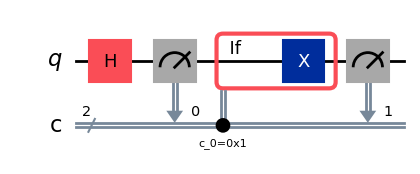

In [3]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì§ÏóàÏúºÎãà Ïù¥ ÌöåÎ°úÎ•º Ïó¨Îü¨Î≤à Ïã§ÌñâÏãúÌÇ§Í≤†ÏäµÎãàÎã§. Ï≤´Î≤àÏß∏ Ï∏°Ï†ïÏùÄ 0 ÎòêÎäî 1Ïù¥ Í∞ÅÍ∞Å Ï†àÎ∞òÏùò ÌôïÎ•†Î°ú ÎÇòÏò§Í≤†ÏßÄÎßå ÎëêÎ≤àÏß∏ Ï∏°Ï†ïÏùÄ Ìï≠ÏÉÅ 0Ïù¥ ÎÇòÏò§Îäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.

In [4]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.c.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'01': 4946, '00': 5054}


ÏòàÏÉÅÌïú Î∞îÏôÄ Í∞ôÏù¥ Ï≤´ Î≤àÏß∏ Ï∏°Ï†ï Í≤∞Í≥ºÎäî 0ÎòêÎäî 1 Î™®Îëê ÎÇòÏò¨ Ïàò ÏûàÏßÄÎßå, Îëê Î≤àÏß∏ Ï∏°Ï†ï Í≤∞Í≥ºÎäî 0Îßå ÎÇòÏòµÎãàÎã§. QiskitÏùÄ little-endian orderingÏùÑ ÏÇ¨Ïö©ÌïúÎã§Îäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßêÍ∏∞ Î∞îÎûçÎãàÎã§. Î¨∏ÏûêÏó¥ Ïò§Î•∏Ï™ΩÏù¥ Ï≤´ Î≤àÏß∏ bit(`b0`)Ïù¥Í≥†, Î¨∏ÏûêÏó¥ ÏôºÏ™ΩÏù¥ Îëê Î≤àÏß∏ bit(`b1`)ÏûÖÎãàÎã§.

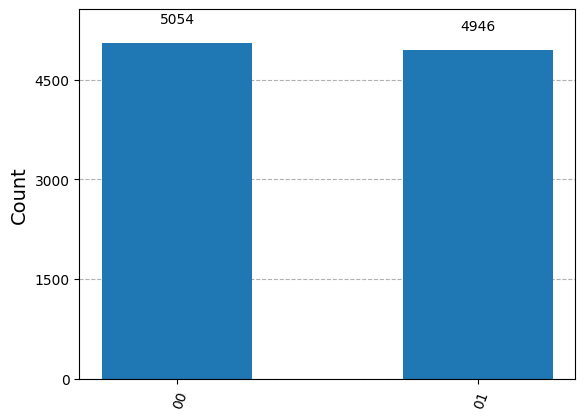

In [5]:
plot_histogram(counts_sampler)

ÏúÑÏóêÏÑúÎäî Ï∏°Ï†ï Í∞íÏù¥ ÌäπÏ†ïÌïú Ï°∞Í±¥ÏùÑ ÎßåÏ°±Ìï† Îïå, ÌäπÏ†ï ÌñâÎèôÏùÑ ÌïòÎäî ÌöåÎ°úÎ•º ÎßåÎì§ÏóàÏäµÎãàÎã§. Í∑∏Îüº ÌäπÏ†ï Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùÑ Îïå Ïñ¥Îñ†Ìïú Ïó∞ÏÇ∞ÏùÑ Í∞ÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†ÍπåÏöî? ÌååÏù¥Ïç¨ÏóêÏÑú ifÏôÄ Ìï®Íªò ÏûêÏ£º ÎÇòÏò§Îäî elseÎ¨∏Ïù¥ ÏÉùÍ∞ÅÎÇòÏãúÎÇòÏöî? Ïù¥ÏôÄ Í∞ôÏùÄ Í∞úÎÖêÏù¥ dynamic circuitÏóêÎèÑ Ï°¥Ïû¨Ìï©ÎãàÎã§. ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏΩîÎî©ÌïòÎ©¥ Îê©ÎãàÎã§.

In [6]:
with qc.if_test(Ï°∞Í±¥) as else_:
    # Ï°∞Í±¥ ÎßåÏ°±Ìï† Îïå ÏàòÌñâÌï† ÏûëÏóÖ
    
with else_:
    # Ï°∞Í±¥ Î∂àÎßåÏ°± Ïãú ÏàòÌñâÌï† ÏûëÏóÖ

IndentationError: expected an indented block after 'with' statement on line 1 (3587900472.py, line 4)

ÏòàÏãúÎäî ÏïÑÎûòÏóê ÏûàÏäµÎãàÎã§.

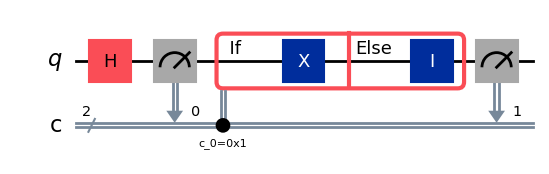

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)) as else_:
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)


with else_:
    # if the condition is satisfied (b0 != 1), then apply identity operator to 0
    qc.id(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏùò dynamic circuitÏùÑ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§!

<div class="alert alert-block alert-success">

### Exercise 1: Your first classical feedforward and control flow

ÏïûÏùò ÏòàÏãúÎ≥¥Îã§Îäî Ï°∞Í∏à Îçî Î≥µÏû°Ìïú Í≤ÉÏùÑ ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§. 2Í∞úÏùò ÌÅêÎπÑÌä∏ÏôÄ 2Í∞úÏùò Í≥†Ï†ÑÎπÑÌä∏Î•º Í∞ÄÏßÑ ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì§Í≥† `q0`Ïùò Í¥ÄÏ∏° Í≤∞Í≥ºÏóê Îî∞Îùº `q1`Ïóê Í∞ÄÌïòÎäî gateÎ•º Îã§Î•¥Í≤å Ìï† Í≤É ÏûÖÎãàÎã§. Ïó¨Îü¨Î∂ÑÏù¥ ÎßåÎìúÏÖîÏïº ÌïòÎäî ÌöåÎ°úÎäî ÎßåÏïΩ `q0` Í¥ÄÏ∏° Í≤∞Í≥ºÍ∞Ä 0Ïù¥ÎùºÎ©¥ $X$ Í≤åÏù¥Ìä∏Î•º `q1`Ïóê Í∞ÄÌïòÍ≥†, `q0` Í¥ÄÏ∏° Í≤∞Í≥ºÍ∞Ä 1Ïù¥ÎùºÎ©¥ Hadamard Í≤åÏù¥Ìä∏Î•º `q1`Ïóê Í∞ÄÌïòÎäî ÌöåÎ°úÏûÖÎãàÎã§. ÏïÑÎûòÏóê ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.

**Ìï¥ÏïºÌï† Ïùº:**  ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏùÑ Î≥¥ÏãúÎ©¥ `q0` Í¥ÄÏ∏° Í≤∞Í≥ºÏóê Î¨¥ÏûëÏúÑÏÑ±ÏùÑ Î∂ÄÏó¨ÌïòÍ∏∞ ÏúÑÌï¥ `q0`Ïóê Hadmard Í≤åÏù¥Ìä∏Î•º Ï≤òÏùåÏóê Í∞ÄÌï¥ÎëêÏóàÏäµÎãàÎã§. Í∑∏ ÌõÑ, `q0`Ïùò Í¥ÄÏ∏° Í≤∞Í≥ºÎ•º `b0`Ïóê Ï†ÄÏû•Ìï† Í≤ÉÏûÖÎãàÎã§. Í∑∏ ÌõÑ Ïúó Î¨∏Îã®ÏóêÏÑú ÎßêÌïú classical feedforward Ï°∞Í±¥Ïóê Í∏∞Î∞òÌïòÏó¨ `q1`Ïóê gateÎ•º Í∞ÄÌïòÍ≥† `q1`ÏùÑ Ï∏°Ï†ïÌïú Í≤∞Í≥ºÎ•º `b1`Ïóê Ï†ÄÏû•Ìï† Í≤ÉÏûÖÎãàÎã§.

ÎßåÏïΩ, `if_test()` Î¨∏ÏùÑ ÏûëÏÑ±ÌïòÎäî Í≤ÉÏóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏúºÏãúÎã§Î©¥ [ÎßÅÌÅ¨](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#if_test)Î•º ÌÅ¥Î¶≠ÌïòÏó¨ `if_test()` Îã§ÌÅêÎ©òÌÖåÏù¥ÏÖòÏùÑ Ï∞∏Í≥†ÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.

**Îã®, `if_test()` Î¨∏ÏùÄ Ìïú Î≤àÎßå ÏÇ¨Ïö©ÌïòÏÖîÏïº Ìï©ÎãàÎã§.**
    
</div>

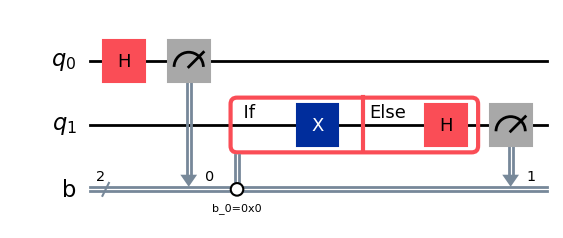

In [7]:
qr = QuantumRegister(2, name = "q")
cr = ClassicalRegister(2, name = "b")
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)


### Write your code below this line ### 
with qc.if_test((b0, 0)) as else_:
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q1)

with else_:
    # if the condition is satisfied (b0 != 1), then apply identity operator to 0
    qc.h(q1)
### Do not change the code below this line ###


qc.measure(q1, b1)
answer1 = qc
qc.draw(output="mpl", idle_wires=False)

ÏïÑÎûòÏóêÏÑú Ïó¨Îü¨Î∂ÑÏù¥ ÎßåÎì† ÌöåÎ°úÍ∞Ä Ïûò ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïñ¥Îñ†Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏôÄÏïº ÌïòÎäîÏßÄ ÎØ∏Î¶¨ ÏÉùÍ∞ÅÌï¥Î≥¥Í≥† ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄ Ïã§ÌñâÏãúÏºúÎ≥¥Îäî Í≤ÉÎèÑ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

In [8]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.b.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'10': 5031, '11': 2544, '01': 2425}


In [9]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4a

grade_challenge4a(answer1, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


<div class="alert alert-block alert-success">

### Exercise 2: Result Analysis

Ïù¥ÏÉÅÏ†ÅÏù∏ Í≤ΩÏö∞ ÏúÑÏùò ÌöåÎ°úÏóêÏÑú Í∞ÅÍ∞ÅÏùò Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ ÌôïÎ•†ÏùÄ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî?

**Ìï¥ÏïºÌï† Ïùº:** ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏùÑ Î≥¥ÏãúÎ©¥ ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏùò `answer2`Î•º ÏÑ†Ïñ∏Ìï¥ ÎëêÏóàÏäµÎãàÎã§. Í∞ÅÍ∞ÅÏùò ÌÇ§Ïóê Ìï¥ÎãπÌïòÎäî Î∞∏Î•òÍ∞íÏúºÎ°ú Ìï¥Îãπ ÌÇ§ Í∞íÏù¥ Í¥ÄÏ∏°Îê† ÌôïÎ•†ÏùÑ ÎÑ£Ïñ¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§. **QiskitÏùÄ little-endian ÌëúÍ∏∞Î≤ïÏùÑ Îî∞Î•∏Îã§Îäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßàÏÑ∏Ïöî!!**

**Ï∞∏Í≥†:** ÌôïÎ•†ÏùÄ ÏÜåÏàò ÌëúÌòÑÏúºÎ°ú Ï†ÅÏúºÏÖîÎèÑ ÎêòÍ≥†, ÎÇòÎàóÏÖà ÌëúÌòÑÏúºÎ°ú Ï†ÅÏúºÏÖîÎèÑ Îê©ÎãàÎã§. ÏÜåÏàòÎ°ú ÌëúÌòÑÌï† Îïå Î¨¥Ìïú ÏÜåÏàòÍ∞Ä ÎÇòÏò§Îäî Í≤ΩÏö∞ÏóêÎäî ÎÇòÎàóÏÖà ÌòïÌÉúÎ°ú Ï†ÅÏúºÏãúÎ©¥ Îê©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, $\frac{1}{6}$ ÌôïÎ•†ÏùÑ Ï†ÅÍ≥† Ïã∂ÏùÄ Í≤ΩÏö∞ÏóêÎäî 0.166666 Ïù¥ ÏïÑÎãå 1/6Î°ú Ï†ÅÏúºÏãúÎ©¥ Ï±ÑÏ†êÏù¥ Ïò¨Î∞îÎ•¥Í≤å Îê† Í≤ÉÏûÖÎãàÎã§.

</div>

In [10]:
answer2 = {}

answer2['00'] = 0   ## add your code here
answer2['01'] = 1/4 ## add your code here
answer2['10'] = 1/2 ## add your code here
answer2['11'] = 1/4 ## add your code here

In [11]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4b

grade_challenge4b(answer2, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


## Part 2: Anather method for classical feedforward and control flow

Classical feedforwardÏôÄ control flowÎäî `if_test()`Î¨∏ ÎßêÍ≥†ÎèÑ Îã§Î•∏ Î©îÏÑúÎìúÎ•º Ïù¥Ïö©Ìï¥ÏÑúÎèÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî `switch`, `for_loop`, `while_loop` Î©îÏÑúÎìúÎì§Ïóê ÎåÄÌï¥ÏÑú ÏÑ§Î™ÖÎìúÎ¶¨Í≤†ÏäµÎãàÎã§. 

- If statement - [`QuantumCircuit.if_test`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#if_test)
- Switch statement - [`QuantumCircuit.switch`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#switch)
- For loop - [`QuantumCircuit.for_loop`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#for_loop)
- While loop - [`QuantumCircuit.while_loop`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#while_loop)

### Switch statement

`switch` Î¨∏ÏùÄ Í≥†Ï†ÑÏ†ÅÏù∏ ÎπÑÌä∏Ïùò Í∞íÏóê Îî∞Îùº ÎèôÏûëÏùÑ ÏÑ†ÌÉùÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§. Ïù¥Îäî `if_test` Î¨∏Í≥º ÎπÑÏä∑ÌïòÏßÄÎßå, Î∂ÑÍ∏∞ Î°úÏßÅÏóê ÎåÄÌï¥ Îçî ÎßéÏùÄ Í≤ΩÏö∞Î•º ÏßÄÏ†ïÌï† Îïå Ìé∏Î¶¨ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§. SwithÎ¨∏Ïù¥ ÏûàÎäî ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥(ÏòàÎ•º Îì§Ïñ¥, CÏñ∏Ïñ¥, 3.10Î≤ÑÏ†Ñ Ïù¥ÏÉÅÏùò ÌååÏù¥Ïç¨)Î•º Îã§Î§Ñ Î≥∏ Î∂ÑÏù¥ÏãúÎùºÎ©¥ ÏùµÏàôÌïú ÌòïÌÉúÏùº Í≤ÉÏûÖÎãàÎã§. ÏïÑÎûò ÏòàÏãúÏóêÏÑúÎäî, 1-ÌÅêÎπÑÌä∏ ÏñëÏûê ÌöåÎ°úÏùò ÌÅêÎπÑÌä∏Ïóê hadamard Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©ÌïòÍ≥† Ï∏°Ï†ïÌï©ÎãàÎã§. Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä 0Ïù¥Î©¥ ÌÅêÎπÑÌä∏Ïóê X Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©ÌïòÍ≥†, Í≤∞Í≥ºÍ∞Ä 1Ïù¥Î©¥ Z Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìï©ÎãàÎã§. Í≤∞Í≥ºÏ†ÅÏù∏ Ï∏°Ï†ï Í∞íÏùÄ 100% ÌôïÎ•†Î°ú 1Ïù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.

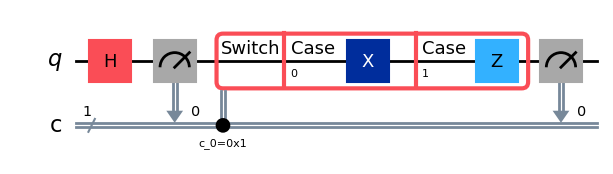

In [12]:
qubits = QuantumRegister(1, name='q')
clbits = ClassicalRegister(1, name='c')
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

In [13]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (circuit)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.c.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'1': 10000}


ÏúÑ ÏòàÏ†úÏóêÏÑúÎäî 1Í∞úÏùò Í≥†Ï†Ñ ÎπÑÌä∏Î•º ÏÇ¨Ïö©ÌïòÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÎä•Ìïú Í≤ΩÏö∞Îäî Îëê Í∞ÄÏßÄÎøêÏù¥ÏóàÍ≥†, Ïù¥Îäî if-else Î¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§. `switch` Î¨∏ÏùÄ Ïó¨Îü¨ ÎπÑÌä∏Î°ú Íµ¨ÏÑ±Îêú Í≥†Ï†Ñ Î†àÏßÄÏä§ÌÑ∞Ïùò Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îã§ÏñëÌïú Î∂ÑÍ∏∞Î•º Ìï† Îïå Ï£ºÎ°ú Ïú†Ïö©ÌïòÎ©∞, Îã§Ïùå ÏòàÏ†úÏóêÏÑú Ïù¥Î•º Î≥¥Ïó¨Ï§çÎãàÎã§. ÏïÑÎûò ÏòàÏ†úÏóêÏÑúÎäî Ïñ¥Îñ†Ìïú Í≤ΩÏö∞ÏóêÎèÑ Ìï¥ÎãπÎêòÏßÄ ÏïäÏùÑ Îïå Ïã§ÌñâÎêòÎäî Í∏∞Î≥∏(default) ÏºÄÏù¥Ïä§Î•º Íµ¨ÏÑ±ÌïòÎäî Î∞©Î≤ïÎèÑ Ìï®Íªò Î≥º Ïàò ÏûàÏäµÎãàÎã§. `switch` Î¨∏ÏùÄ Îã® ÌïòÎÇòÏùò Î∏îÎ°ùÎßå Ïã§ÌñâÎêòÎ©∞, ÌïòÏúÑ Î∏îÎ°ùÏúºÎ°úÎäî Ïù¥Ïñ¥ÏßÄÏßÄ ÏïäÎäîÎã§Îäî Ï†êÏóê Ïú†ÏùòÌïòÏÑ∏Ïöî.

ÏïÑÎûò ÏòàÏ†úÏóêÏÑúÎäî Îëê ÌÅêÎπÑÌä∏Ïóê Í∞ÅÍ∞Å hadamard Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìïú ÌõÑ Ï∏°Ï†ïÌï©ÎãàÎã§. 
- Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä 00 ÎòêÎäî 11Ïù¥Î©¥ ÏÑ∏ Î≤àÏß∏ ÌÅêÎπÑÌä∏Ïóê Z Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.
- Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä 01Ïù¥Î©¥ ÏÑ∏ Î≤àÏß∏ ÌÅêÎπÑÌä∏Ïóê Y Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.
- Ïù¥Ï†ÑÏùò Ïñ¥Îñ§ Í≤ΩÏö∞ÎèÑ Ìï¥ÎãπÌïòÎêòÏßÄ ÏïäÏúºÎ©¥ X Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìï©ÎãàÎã§
- ÎßàÏßÄÎßâÏúºÎ°ú ÏÑ∏ Î≤àÏß∏ ÌÅêÎπÑÌä∏Î•º Ï∏°Ï†ïÌï©ÎãàÎã§.

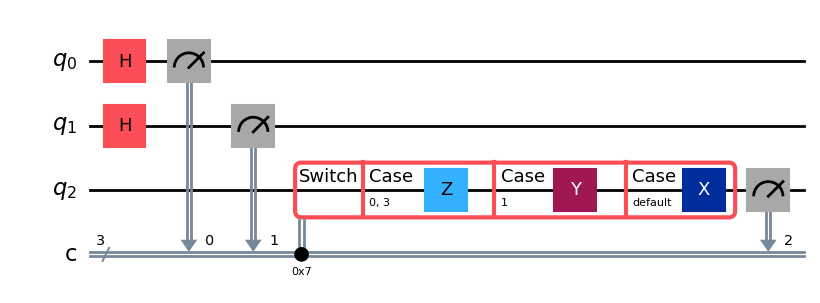

In [14]:
qubits = QuantumRegister(3, name='q')
clbits = ClassicalRegister(3, name='c')
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.switch(clbits) as case:
    with case(0b000, 0b011):
        circuit.z(q2)
    with case(0b001):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 267, '110': 249, '011': 265, '000': 243}

### For loop

For loopÎäî ÌÅ¥ÎûòÏãù Í∞íÏùò ÏãúÌÄÄÏä§Î•º Î∞òÎ≥µÌïòÎ©¥ÏÑú Í∞Å Î∞òÎ≥µÎßàÎã§ Î™áÎ™á Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌïòÎäîÎç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

ÏïÑÎûò ÏòàÏ†úÏóêÏÑúÎäî for loopÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÅêÎπÑÌä∏ ÌïòÎÇòÏóê 5Î≤àÏùò X Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©Ìïú ÌõÑ Ïù¥Î•º Ï∏°Ï†ïÌï©ÎãàÎã§. X Í≤åÏù¥Ìä∏Î•º ÌôÄÏàò Î≤à Ï†ÅÏö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, ÏµúÏ¢ÖÏ†ÅÏù∏ Ìö®Í≥ºÎäî ÌÅêÎπÑÌä∏Î•º $|0\rangle$ÏóêÏÑú $|1\rangle$Î°ú Îí§ÏßëÎäî Í≤ÉÏûÖÎãàÎã§.

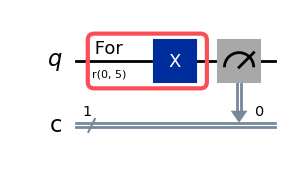

In [15]:
qubits = QuantumRegister(1, name='q')
clbits = ClassicalRegister(1, name='c')
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

### While loop

While loopÎäî ÌäπÏ†ï Ï°∞Í±¥Ïù¥ ÎßåÏ°±ÎêòÎäî ÎèôÏïà Î™ÖÎ†πÏùÑ Î∞òÎ≥µÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

ÏïÑÎûò ÏòàÏ†úÏóêÏÑúÎäî Îëê ÌÅêÎπÑÌä∏Ïóê hadamard Í≤åÏù¥Ìä∏Î•º Ï†ÅÏö©ÌïòÍ≥† Ïù¥Î•º Ï∏°Ï†ïÌï©ÎãàÎã§. Í∑∏Îü∞ Îã§Ïùå, Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä 11Ïùº ÎèôÏïà Ïù¥ Ï†àÏ∞®Î•º Î∞òÎ≥µÌïòÎäî while Î£®ÌîÑÎ•º ÎßåÎì≠ÎãàÎã§. Í∑∏ Í≤∞Í≥º, ÏµúÏ¢Ö Ï∏°Ï†ïÏùÄ Ï†àÎåÄ 11Ïù¥ ÎêòÏßÄ ÏïäÏúºÎ©∞, ÎÇòÎ®∏ÏßÄ Í∞ÄÎä•Ìïú Í≤∞Í≥ºÎäî ÎåÄÎûµ ÎèôÏùºÌïú ÎπàÎèÑÎ°ú ÎÇòÌÉÄÎÇòÏïº Ìï©ÎãàÎã§.

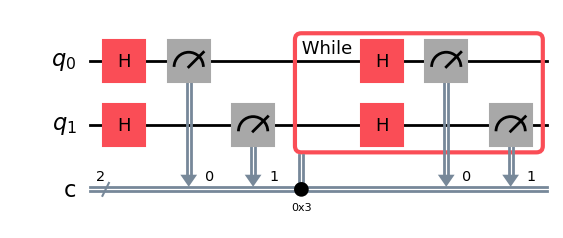

In [16]:
qubits = QuantumRegister(2, name='q')
clbits = ClassicalRegister(2, name='c')
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1 = qubits
c0, c1 = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 334, '10': 368, '00': 322}

In [17]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (circuit)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.c.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'01': 3351, '00': 3346, '10': 3303}


### Break loop, Continue loop

`Break`ÏôÄ `Continue`Îäî Î∞òÎ≥µÎ¨∏ÏóêÏÑú control flowÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî Îëê Í∞ÄÏßÄ Ï§ëÏöîÌïú Î™ÖÎ†πÏñ¥ÏûÖÎãàÎã§. Ïù¥ Îëê Î™ÖÎ†πÏñ¥Îäî Î∞òÎ≥µÎ¨∏ ÎÇ¥ÏóêÏÑú ÌäπÏ†ï Ï°∞Í±¥Ïù¥ Î∞úÏÉùÌñàÏùÑ Îïå Î∞òÎ≥µÏùÑ Ï§ëÎã®ÌïòÍ±∞ÎÇò Í±¥ÎÑàÎõ∞ÎèÑÎ°ù Ìï† Ïàò ÏûàÏäµÎãàÎã§.

`break_loop` Îäî Î∞òÎ≥µÎ¨∏ÏùÑ ÏôÑÏ†ÑÌûà **Ï¢ÖÎ£å**ÏãúÌÇ§Îäî Î™ÖÎ†πÏñ¥ÏûÖÎãàÎã§. For loop, while loop Îì±Ïùò Î∞òÎ≥µÎ¨∏ ÏïàÏóêÏÑú `break`Í∞Ä Ïã§ÌñâÎêòÎ©¥, Ìï¥Îãπ Î∞òÎ≥µÎ¨∏ÏùÑ Ï¶âÏãú Îπ†Ï†∏ÎÇòÏò§Í≥†, Î∞òÎ≥µÎ¨∏ Ïù¥ÌõÑÏùò ÏΩîÎìúÍ∞Ä Ïã§ÌñâÎê©ÎãàÎã§. Ï£ºÎ°ú ÌäπÏ†ï Ï°∞Í±¥Ïù¥ ÎßåÏ°±ÎêòÏóàÏùÑ Îïå Î∞òÎ≥µÏùÑ Î©àÏ∂îÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê©ÎãàÎã§. QiskitÏóêÏÑúÎäî ÌäπÏ†ï Ï°∞Í±¥ÏùÑ `c_if` Î©îÏÑúÎìúÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™ÖÏãúÌï©ÎãàÎã§.

`continue_loop` Îäî ÌòÑÏû¨ Î∞òÎ≥µÏùÑ **Í±¥ÎÑà Îõ∞Í≥†**, Îã§Ïùå Î∞òÎ≥µÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ≤å Ìï©ÎãàÎã§. Ï¶â, Î∞òÎ≥µÎ¨∏ÏùÄ Ï¢ÖÎ£åÎêòÏßÄ ÏïäÏßÄÎßå, continue Ïù¥ÌõÑÏùò ÏΩîÎìúÍ∞Ä Ïã§ÌñâÎêòÏßÄ ÏïäÍ≥† Îã§Ïùå Î∞òÎ≥µÏù¥ ÏãúÏûëÎê©ÎãàÎã§. ÌäπÏ†ï Ï°∞Í±¥ÏóêÏÑú Î∞òÎ≥µÎ¨∏Ïùò ÏùºÎ∂ÄÎ•º Î¨¥ÏãúÌïòÍ≥† Í≥ÑÏÜçÌï¥ÏÑú Îã§Ïùå Î∞òÎ≥µÏùÑ ÏßÑÌñâÌï† Îïå ÏÇ¨Ïö©Îê©ÎãàÎã§.

ÏòàÏãúÎ•º Î≥¥Í≤†ÏäµÎãàÎã§. Îã§ÏùåÏùÄ break Î¨∏Ïù¥ ÏóÜÎã§Î©¥ X Í≤åÏù¥Ìä∏Í∞Ä 10Î≤à Í∞ÄÌï¥Ï†∏ÏÑú Í≤∞Íµ≠ÏóêÎäî 0Ïù¥ Ï∏°Ï†ïÎêòÏñ¥Ïïº ÌïòÏßÄÎßå, break Î¨∏Ïóê ÏùòÌï¥ Ï∏°Ï†ï Í≤∞Í≥ºÍ∞Ä 1Ïù¥ Îê† Îïå(X Í≤åÏù¥Ìä∏Î•º Ìïú Î≤à Í∞ÄÌñàÏùÑ Îïå) Î∞òÎ≥µÎ¨∏ÏùÑ ÌÉàÏ∂úÌïòÏó¨ 1Ïù¥ Ï∏°Ï†ïÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

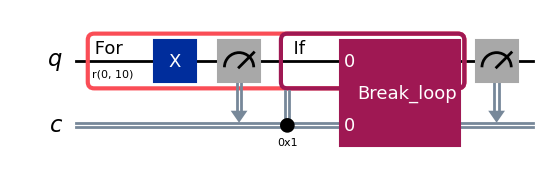

In [18]:
# Prepare quantum and classical bits
qubits = QuantumRegister(1, name='q')
clbits = ClassicalRegister(1, name='c')
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

# A loop to flip the qubit 10 times
with circuit.for_loop(range(10)) as i:
    circuit.x(q0)               # Apply X gate to flip the qubit state
    circuit.measure(q0, c0)     # Measure the state of q0
    with circuit.if_test((clbits, 1)):
        circuit.break_loop()  # Break the loop if the measurement result is 1

# Final measurement
circuit.measure(q0, c0)

# Visualize the circuit
circuit.draw('mpl')


In [19]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (circuit)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.c.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'1': 10000}


<div class="alert alert-block alert-success">

### Exercise 3: Make the same dynamical circuit

**Ìï¥ÏïºÌï† Ïùº:**  ÏïÑÎûòÏóê Ï£ºÏñ¥ÏßÑ ÏñëÏûêÌöåÎ°úÏôÄ Í∞ôÏùÄ ÏñëÏûêÌöåÎ°úÎ•º ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî.
    
</div>

<div class="alert alert-block alert-warning">

ÏïÑÎûò Í∑∏Î¶ºÏóêÏÑú IF Î¨∏ ÌååÎûÄÏÉâ Î∞ïÏä§ Ïò§Î•∏Ï™Ω Î≥ÄÍ≥º For Î¨∏ ÏûêÏ£ºÏÉâ Î∞ïÏä§ Ïò§Î•∏Ï™Ω Î≥ÄÏù¥ Í≤πÏ≥êÏ†∏ ÏûàÏäµÎãàÎã§. Ï¶â For Î¨∏ ÏïàÏóê If Î¨∏Ïù¥ ÏûàÏäµÎãàÎã§. Í∑∏Î¶ºÏóêÏÑúÎäî Ïûò Ïïà Î≥¥Ïó¨ Ïù¥Î†áÍ≤å ÎßêÏîÄÎìúÎ¶ΩÎãàÎã§.

</div>

![Quantum circuit](../img/quantum_circuit.png)

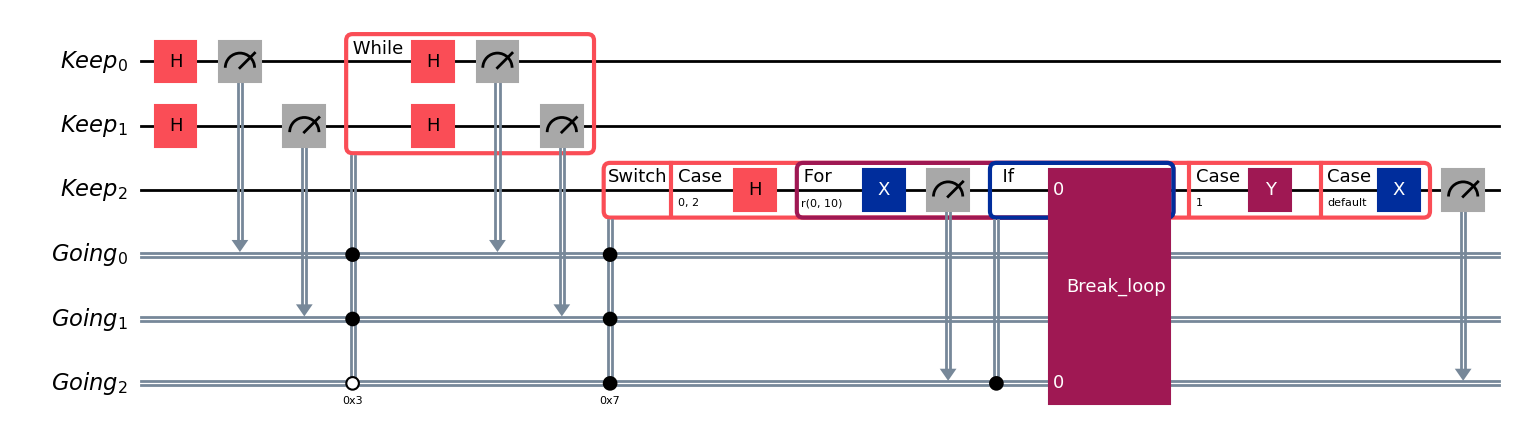

In [20]:
qubits = QuantumRegister(3, name='Keep')
clbits = ClassicalRegister(3, name='Going')
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1, q2 = qubits
c0, c1, c2 = clbits

### Write your code below this line ### 

circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)

with circuit.switch(clbits) as case:
    with case(0b000, 0b010):
        circuit.h(q2)
        with circuit.for_loop(range(10)) as i:
            circuit.x(q2)
            circuit.measure(q2, c2)
            with circuit.if_test((c2, 1)):
                circuit.break_loop()
    with case(0b001):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
 
circuit.measure(q2, c2)
 
### Do not change the code below this line ###

answer3 = circuit
fig = circuit.draw("mpl")
circuit.draw('mpl')

# fig.savefig('../img/quantum_circuit.png')

In [21]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (circuit)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.Going.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'100': 3325, '110': 3275, '101': 3400}


In [22]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4c

grade_challenge4c(answer3, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


<div class="alert alert-block alert-success">

### Exercise 4: Result Analysis

Ïù¥ÏÉÅÏ†ÅÏù∏ Í≤ΩÏö∞ ÏúÑÏùò ÌöåÎ°úÏóêÏÑú Í∞ÅÍ∞ÅÏùò Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ ÌôïÎ•†ÏùÄ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî?

**Ìï¥ÏïºÌï† Ïùº**: ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏùÑ Î≥¥ÏãúÎ©¥ ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏùò `answer4`Î•º ÏÑ†Ïñ∏Ìï¥ ÎëêÏóàÏäµÎãàÎã§. Í∞ÅÍ∞ÅÏùò ÌÇ§Ïóê Ìï¥ÎãπÌïòÎäî Î∞∏Î•òÍ∞íÏúºÎ°ú Ìï¥Îãπ ÌÇ§ Í∞íÏù¥ Í¥ÄÏ∏°Îê† ÌôïÎ•†ÏùÑ ÎÑ£Ïñ¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§. **QiskitÏùÄ little-endian ÌëúÍ∏∞Î≤ïÏùÑ Îî∞Î•∏Îã§Îäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßàÏÑ∏Ïöî!!**

**Ï∞∏Í≥†:** ÌôïÎ•†ÏùÄ ÏÜåÏàò ÌëúÌòÑÏúºÎ°ú Ï†ÅÏúºÏÖîÎèÑ ÎêòÍ≥†, ÎÇòÎàóÏÖà ÌëúÌòÑÏúºÎ°ú Ï†ÅÏúºÏÖîÎèÑ Îê©ÎãàÎã§. ÏÜåÏàòÎ°ú ÌëúÌòÑÌï† Îïå Î¨¥Ìïú ÏÜåÏàòÍ∞Ä ÎÇòÏò§Îäî Í≤ΩÏö∞ÏóêÎäî ÎÇòÎàóÏÖà ÌòïÌÉúÎ°ú Ï†ÅÏúºÏãúÎ©¥ Îê©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, $\frac{1}{6}$ ÌôïÎ•†ÏùÑ Ï†ÅÍ≥† Ïã∂ÏùÄ Í≤ΩÏö∞ÏóêÎäî 0.166666 Ïù¥ ÏïÑÎãå 1/6Î°ú Ï†ÅÏúºÏãúÎ©¥ Ï±ÑÏ†êÏù¥ Ïò¨Î∞îÎ•¥Í≤å Îê† Í≤ÉÏûÖÎãàÎã§.

</div>

In [23]:
answer4 = {}

answer4['000'] = 0   ## add your code here
answer4['001'] = 0   ## add your code here
answer4['010'] = 0   ## add your code here
answer4['011'] = 0   ## add your code here
answer4['100'] = 1/3 ## add your code here
answer4['101'] = 1/3 ## add your code here
answer4['110'] = 1/3 ## add your code here
answer4['111'] = 0   ## add your code here

In [24]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4d

grade_challenge4d(answer4, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


## Part 3: Repeat Until Success

ÏñëÏûê ÏÉÅÌÉú Ï∏°Ï†ï Í≤∞Í≥ºÎäî ÌôïÎ•†Ï†ÅÏúºÎ°ú ÎÇòÏò§Í∏∞ ÎïåÎ¨∏Ïóê Ïó¨Îü¨Î∂ÑÏù¥ ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÏßÄÎèÑ ÏïäÏùÑ ÎïåÍ∞Ä ÏûàÏäµÎãàÎã§. Ïó¨Îü¨Î∂ÑÏù¥ ÎßåÎì§Í≥†Ïûê ÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏóê Îî∞Îùº Ï§ëÍ∞ÑÏóê Ï∏°Ï†ïÏùÑ ÌñàÏùÑ Îïå ÌäπÏ†ïÌïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏôÄÏïºÏßÄÎßå Í∑∏ ÌõÑÏóê Ïó∞ÏÇ∞ÏùÑ Ìï¥ÏÑú ÏõêÌïòÎäî Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï† Ïàò ÏûàÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§. ÎåÄÌëúÏ†ÅÏù∏ ÏòàÏãúÎ°úÎäî HHL ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÏûàÏäµÎãàÎã§.

ÎßåÏïΩ Ïó¨Îü¨Î∂ÑÏù¥ ÏõêÌïòÏßÄ ÏïäÏùÄ Í≤∞Í≥ºÍ≥º Ï§ëÍ∞Ñ Ï∏°Ï†ï Îïå ÎÇòÏò§Î©¥ Ïñ¥ÎñªÍ≤å ÌïòÏã§ Í≤ÉÏù∏Í∞ÄÏöî? Ïùå.. Îã§Ïãú ÏãúÎèÑÌïòÎ©¥ Îê©ÎãàÎã§! Ïó¨Îü¨Î∂ÑÏù¥ ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ ÌôïÎ•†Ïù¥ 0Îßå ÏïÑÎãàÎùºÎ©¥, Ìï¥Îãπ Í≥ºÏ†ïÏùÑ Í≥ÑÏÜç Î∞òÎ≥µÌïòÎã§Î≥¥Î©¥ Í≤∞Íµ≠ Ïó¨Îü¨Î∂ÑÏù¥ ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§Í≤å Îê† Í≤ÉÏûÖÎãàÎã§.

Î≥¥ÌÜµÏùÄ ÎßéÏùÄ Î∞òÎ≥µÏùÑ ÌïòÏßÄ ÏïäÏïÑÎèÑ ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä Ïûò ÎÇòÏòµÎãàÎã§(Í∑∏Î†áÍ≤å ÎêòÎèÑÎ°ù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÎßåÎìúÎäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤ÉÏûÖÎãàÎã§).

Ïù¥Î≤à ÌååÌä∏ÏóêÏÑúÎäî "ÏÑ±Í≥µÌï† ÎïåÍπåÏßÄ Î∞òÎ≥µÌïòÍ∏∞" Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ $R_X(\theta)$ gate(Ïù¥Í≤ÉÏù¥ Î¨¥ÏóáÏù∏ÏßÄÎäî Îí§ÏóêÏÑú ÏÑ§Î™ÖÎìúÎ¶¨Í≤†ÏäµÎãàÎã§)Î•º ÎßåÎì§ Í≤ÉÏûÖÎãàÎã§. Ïó¨Í∏∞ÏÑú Ïó¨Îü¨Î∂ÑÏù¥ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî gateÎì§ÏùÄ $\{H,\,X,\,S,\,\text{Toffoli}\}$ Ïù¥Í≥†, $\theta / \pi$Í∞Ä Î¨¥Î¶¨ÏàòÏù∏ Í≤ΩÏö∞Ïùò $R_X(\theta)$ gateÎ•º Íµ¨ÌòÑÌï¥ÏïºÌï©ÎãàÎã§. ÌäπÌûà Ïó¨Îü¨Î∂ÑÏùÄ $\cos\theta = \frac35$Ïóê Ìï¥ÎãπÌïòÎäî $\theta$ ÎßåÌÅºÏùò ÌöåÏ†ÑÏùÑ Íµ¨ÌòÑÌïòÏãúÎ©¥ Îê©ÎãàÎã§. Ïù¥Í≤ÉÏùÄ ÏñëÏûêÏª¥Ìì®ÌåÖ Í¥ÄÎ†® ÎåÄÌëú ÍµêÏû¨ÎùºÍ≥† Ìï† Ïàò ÏûàÎäî Nielsen and ChuangÏùò _Quantum Computation and Quantum Information_, 10<sup>th</sup> anniversary edition, Exercise 4.41 ÏóêÏÑú Îã§Î£®Îäî universality of the finite gate set ÎÇ¥Ïö©Í≥º Í¥ÄÎ†®ÎêòÏñ¥ ÏûàÎã§Îäî Í≤ÉÏùÑ ÎßêÏîÄÎìúÎ¶ΩÎãàÎã§.

Ïù¥Í≤ÉÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î®ºÏ†Ä 3Í∞úÏùò qubitsÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. ÌïòÎÇòÏùò qubitÏùÄ "target" qubitÏù¥ÎùºÍ≥† Î∂ÄÎ•º Í≤ÉÏù¥Î©∞, $R_X(\theta)$ gateÍ∞Ä Í∞ÄÌï¥ÏßÄÍ≤å Îê† qubit ÏûÖÎãàÎã§. Îã§Î•∏ ÎëêÍ∞úÏùò qubitsÎäî "syndrome" qubit Ïù¥ÎùºÍ≥† Î∂ÄÎ•¥Î©∞ Ïù¥Í≤ÉÏùÑ Ï∏°Ï†ïÌïòÏó¨ target qubitÏóê ÏõêÌïòÎäî Ïó∞ÏÇ∞Ïù¥ Í∞ÄÌï¥Ï°åÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÍ≤å Îê† Í≤ÉÏûÖÎãàÎã§. ÏïÑÎûòÏóêÏÑú Ïó¨Îü¨Î∂ÑÏù¥ ÎßåÎì§Í≤å ÎêòÎäî ÌöåÎ°úÏóêÏÑúÎäî ÎßåÏïΩ syndrome qubitsÎ•º Ï∏°Ï†ïÌñàÏùÑ Îïå Îëò Îã§ $|0\rangle$ÏÉÅÌÉúÎ°ú Ï∏°Ï†ïÏù¥ ÎêúÎã§Î©¥, target qubitÏóê ÏõêÌïòÎäî Ïó∞ÏÇ∞Ïù¥ Í∞ÄÌï¥ÏßÑ Í≤ÉÏù¥Í≥†, Í∑∏Î†áÏßÄ ÏïäÎã§Î©¥ qubitsÎ•º Ï†ÑÎ∂Ä reset ÌïòÍ≥† Îã§Ïãú ÏãúÏûëÌï¥ÏïºÌï† Í≤ÉÏûÖÎãàÎã§.

Í∑∏Îüº $R_X(\theta)$ gate Îäî Î¨¥ÏóáÏùºÍπåÏöî? Î®ºÏ†Ä $R_X(\theta)$ gateÏùò ÏàòÏãùÏùÑ Î≥¥Í≤†ÏäµÎãàÎã§.

$$R_X(\theta) = exp(-i\frac{\theta}{2}X) = \begin{bmatrix}\cos(\frac{\theta}{2})&-i\sin(\frac{\theta}{2})\\-i\sin(\frac{\theta}{2})&\cos(\frac{\theta}{2})\\ \end{bmatrix}$$

Ïù¥ÏôÄ Í∞ôÏùÄ single qubit Ïó∞ÏÇ∞ÏûÖÎãàÎã§. Ïù¥Í≤ÉÏù¥ ÏùòÎØ∏ÌïòÎäî Í≤ÉÏùÄ bloch sphere ÏÉÅÏóêÏÑú ÏñëÏûê ÏÉÅÌÉúÎ•º XÏ∂ïÏùÑ Ï§ëÏã¨ÏúºÎ°ú $\theta$ÎßåÌÅº ÌöåÏ†ÑÏãúÌÇ§Îäî Ïó∞ÏÇ∞ÏûÖÎãàÎã§. ÏïÑÎûòÏóêÏÑú Í∑∏ ÏòàÏãúÎ•º Î≥¥Í≤†ÏäµÎãàÎã§.

Ï¥àÍ∏∞ ÏÉÅÌÉú


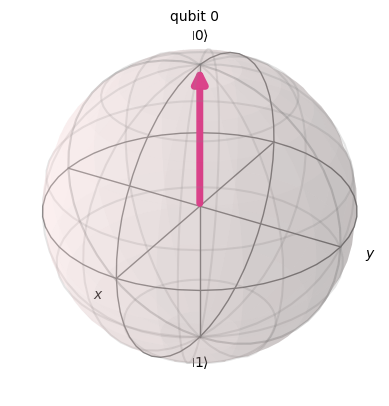


 XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú 30ÎèÑ ÌöåÏ†Ñ


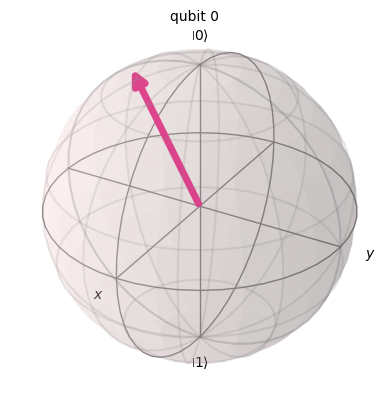


 XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏùåÏùò Î∞©Ìñ•ÏúºÎ°ú 30ÎèÑ ÌöåÏ†Ñ


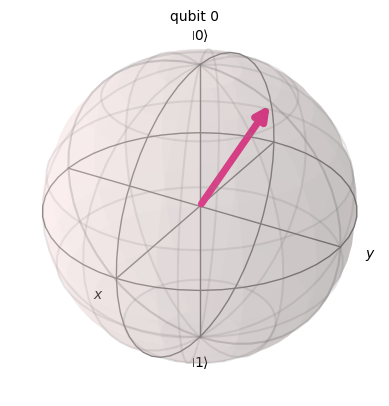


 XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú 90ÎèÑ ÌöåÏ†Ñ


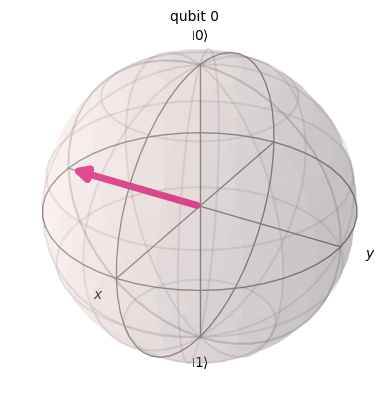

In [25]:
# Prepare single qubit quantum circuit
qc = QuantumCircuit(1)
print("Ï¥àÍ∏∞ ÏÉÅÌÉú")
display(plot_bloch_multivector(qc))

print("\n XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú 30ÎèÑ ÌöåÏ†Ñ")
qc = QuantumCircuit(1)
qc.rx(np.pi/6, 0)                               # 30 degrees = œÄ/6 radians
display(plot_bloch_multivector(qc))

print("\n XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏùåÏùò Î∞©Ìñ•ÏúºÎ°ú 30ÎèÑ ÌöåÏ†Ñ")
qc = QuantumCircuit(1)
qc.rx(-np.pi/6, 0)                              # -30 degrees = -œÄ/6 radians
display(plot_bloch_multivector(qc))

print("\n XÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú 90ÎèÑ ÌöåÏ†Ñ")
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)                               # 90 degrees = œÄ/2 radians
display(plot_bloch_multivector(qc))

Ïù¥Ï†ú Îã§ÏÑØÎ≤àÏß∏ Î¨∏Ï†úÎ•º ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§!

In [26]:
controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")

mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)

<div class="alert alert-block alert-success">

### Exercise 5: Make trial circuit

Ïó¨Îü¨Î∂ÑÏù¥ Í∞ÄÏû• Î®ºÏ†Ä Ìï¥ÏïºÌï† ÏûëÏóÖÏùÄ ÏïÑÎûòÏùò Í∑∏Î¶ºÍ≥º Í∞ôÏùÄ ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì§Ïñ¥Ï£ºÎäî Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. 

![CircuitRX](../img/circuitRx.png)

Ïó¨Îü¨Î∂ÑÏù¥ ÏïÑÎûòÏùò ÌöåÎ°úÎ•º Îçî ÏâΩÍ≤å ÎßåÎìúÏã§ Ïàò ÏûàÎèÑÎ°ù ÏúÑÏùò ÏΩîÎìú ÏÖÄÏóêÏÑú `base` ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎì§Ïñ¥ ÎìúÎ†∏ÏäµÎãàÎã§. `base` ÏñëÏûê ÌöåÎ°úÎäî 3Í∞úÏùò ÌÅêÎπÑÌä∏Îì§Í≥º 3Í∞úÏùò Í≥†Ï†ÑÎπÑÌä∏Î•º Í∞ÄÏßÑ Îπà ÌöåÎ°ú ÏûÖÎãàÎã§.

**Ìï¥ÏïºÌï† Ïùº**: ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏóêÏÑú `trial` Ìï®ÏàòÎ•º ÏôÑÏÑ±ÏãúÌÇµÎãàÎã§. `trial` Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏàúÏÑúÎ°ú ÏñëÏûê ÌöåÎ°úÎ•º ÎßåÎìúÎäî Ìï®ÏàòÏûÖÎãàÎã§.

1. ÏñëÏûê ÌöåÎ°úÏóê ÏûàÎäî Í∞ÅÍ∞ÅÏùò ÌÅêÎπÑÌä∏Ïóê Hadamard Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï©ÎãàÎã§.
2. Toffoli (controlled-controlled-not) Í≤åÏù¥Ìä∏Î•º control ÌÅêÎπÑÌä∏Îì§Í≥º target ÌÅêÎπÑÌä∏Ïóê Í∞ÄÌï©ÎãàÎã§. Toffoli Í≤åÏù¥Ìä∏Îäî control ÌÅêÎπÑÌä∏ 2Í∞úÍ∞Ä Î™®Îëê $|1\rangle$ Ïùº Îïå, target ÌÅêÎπÑÌä∏Ïóê $X$ gateÎ•º Í∞ÄÌïòÎäî Ïó∞ÏÇ∞ÏûÖÎãàÎã§. Toffoli Í≤åÏù¥Ìä∏Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî QuantumCircuitÏùò `.ccx()` Îß§ÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.
3. $S$ gateÎ•º target ÌÅêÎπÑÌä∏Ïóê Í∞ÄÌï©ÎãàÎã§.
4. Step 2ÏôÄ ÎòëÍ∞ôÏùÄ control ÌÅêÎπÑÌä∏ÏôÄ target ÌÅêÎπÑÌä∏ÏùÑ ÎåÄÏÉÅÏúºÎ°ú ÌïòÎäî toffoli Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï©ÎãàÎã§.
5. Step 1Í≥º Í∞ôÏù¥ ÏñëÏûê ÌöåÎ°úÏóê ÏûàÎäî Í∞ÅÍ∞ÅÏùò ÌÅêÎπÑÌä∏Ïóê Hadamard Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï©ÎãàÎã§.
6. 2Í∞úÏùò control ÌÅêÎπÑÌä∏Î•º Ï∏°Ï†ïÏùÑ Ìï©ÎãàÎã§.

</div>

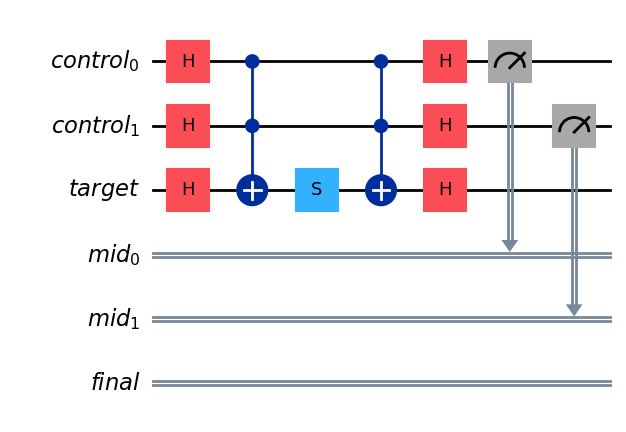

In [27]:
def trial(
    circuit: QuantumCircuit
):
    """Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."""

    
    ### Write your code below this line, making sure it's indented to where this comment begins from ### 
    
    # Hint: You can start solving this problem by coding like this
    # circuit.h([0,1,2])
    circuit.h([0,1,2])
    circuit.ccx(0,1,2)
    circuit.s(2)
    circuit.ccx(0,1,2)
    circuit.h([0,1,2])
    circuit.measure([0,1],[0,1])

    ### Do not change the code below this line ###


qc = base.copy_empty_like()
trial(qc)

answer5 = qc.copy()
qc.draw("mpl", cregbundle=False)

In [28]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4e

grade_challenge4e(answer5, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


<div class="alert alert-block alert-success">

### Exercise 6: Make reset_controls function

Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏù¥ Ìï¥Ïïº Ìï† Îã§Ïùå ÏûëÏóÖÏùÄ Ï∏°Ï†ïÍ∞íÏùÑ ÌôïÏù∏ ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. ÎßåÏïΩ Îëê control qubitsÍ∞Ä Î™®Îëê $|0\rangle$Î°ú Í¥ÄÏ∏°Ïù¥ ÎêòÏóàÎã§Î©¥, target qubitÏóê Í∞ÄÌï¥ÏßÑ gateÎäî $\cos(\theta) = \frac{3}{5}$ÏùÑ ÎßåÏ°±ÌïòÎäî $\theta$Ïóê ÎåÄÌï¥ $R_X(\theta)$ gateÍ∞Ä Îê† Í≤ÉÏûÖÎãàÎã§. ÎßåÏïΩ Îëò Ï§ë ÌïòÎÇòÎùºÎèÑ $|1\rangle$ Ïù¥ÎùºÎ©¥, target qubitÏóê Í∞ÄÌï¥ÏßÄÎäî gateÎäî Îã®ÏàúÌïú $X$ gateÏûÖÎãàÎã§(Ïôú Ïù¥Î†áÍ≤å ÎêòÎäîÏßÄÎäî ÏßÅÏ†ë Í≥ÑÏÇ∞Ìï¥Î≥¥ÏãúÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§!). Îî∞ÎùºÏÑú, target qubitÎ•º Í±¥ÎìúÎ¶¨ÏßÄ ÏïäÍ≥† Îëê control qubitsÎßå Í¥ÄÏ∏°Ìï®ÏúºÎ°úÏç® target qubitÏóê ÏïåÎßûÏùÄ gateÍ∞Ä Í∞ÄÌï¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÎßåÏïΩ Í¥ÄÏ∏° Í≤∞Í≥ºÎ•º Î≥¥ÏïòÏùÑ Îïå, target qubitÏóê ÏõêÌïòÎäî gateÍ∞Ä Í∞ÄÌï¥ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Í≤∞Î°† ÎÇ¥Î¶¥ Ïàò ÏûàÎäî Í≤ΩÏö∞, qubitÏùÑ Î¶¨ÏÖãÌïòÍ≥† Îã§Ïãú Ïã§ÌñâÌïòÎ©¥ Îê©ÎãàÎã§. Ïã§Ìå®ÌñàÏùÑ Í≤ΩÏö∞ Ïñ¥Îñ†Ìïú gateÍ∞Ä Í∞ÄÌï¥ÏßÄÎäîÏßÄ Ïïå ÎïåÏóêÎäî Îçî Ìö®Ïú®Ï†ÅÏúºÎ°ú Î¶¨ÏÖãÏùÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§. Î®ºÏ†Ä, $|1\rangle$Î°ú Í¥ÄÏ∏°Îêú control qubitÏùÄ $X$ gateÎ•º Í∞ÄÌïòÏó¨ $|0\rangle$Î°ú ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§.

Îã§Ïùå ÏÖÄÏóêÏÑú `reset_controls` Ìï®Ïàò ÎÇ¥Î∂ÄÎ•º Ï±ÑÏõåÏ£ºÏãúÍ∏∏ Î∞îÎûçÎãàÎã§. `reset_controls`ÏóêÏÑúÎäî Îã§Ïùå Í≥ºÏ†ïÎì§ÏùÑ ÏàòÌñâÌïòÎèÑÎ°ù ÏΩîÎî©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.

1. ÎßåÏïΩ Ï≤´Î≤àÏß∏ control qubitÍ∞Ä `measure`Îêú Í∞íÏù¥ 1Ïù¥ÎùºÎ©¥, (Î¶¨ÏÖãÌïòÍ∏∞ ÏúÑÌï¥)Ï≤´Î≤àÏß∏ control qubitÏóê $X$ gateÎ•º Í∞ÄÌï©ÎãàÎã§.
2. ÎßåÏïΩ ÎëêÎ≤àÏß∏ control qubitÍ∞Ä `measure`Îêú Í∞íÏù¥ 1Ïù¥ÎùºÎ©¥, (Î¶¨ÏÖãÌïòÍ∏∞ ÏúÑÌï¥)ÎëêÎ≤àÏß∏ control qubitÏóê $X$ gateÎ•º Í∞ÄÌï©ÎãàÎã§.

</div>

<div class="alert alert-block alert-warning">

`if_test` Î¨∏ÏùÑ Ï¥ù Îëê Î≤à Ïù¥Ïö©ÌïòÏÖîÏïº Ìï©ÎãàÎã§.

</div>

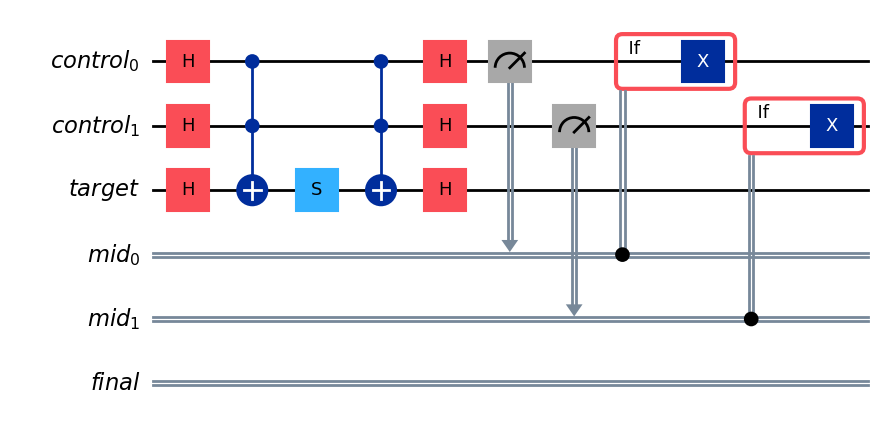

In [29]:
def reset_controls(
    circuit: QuantumCircuit, measures: ClassicalRegister
):
    """Reset the control qubits if they are in |1>."""

    
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 

    with circuit.if_test((measures[0],1)):
        circuit.x(0)
    with circuit.if_test((measures[1],1)):
        circuit.x(1)

    ## Do not change the code below this line ##


qc = base.copy_empty_like()
trial(qc)
reset_controls(qc, mid_measure)

answer6 = qc.copy()
qc.draw("mpl", cregbundle=False)

In [30]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4f

grade_challenge4f(answer6, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


ÏûëÎÖÑÍπåÏßÄÎßå Ìï¥ÎèÑ while_loop, for_loop, break_loop, continue_loop ÏôÄ Í∞ôÏùÄ Î£®ÌîÑ Î¨∏Ïù¥ Ï°¥Ïû¨ ÌïòÏßÄ ÏïäÏïÑ Ï°∞Í±¥Ïóê Îî∞ÎùºÏÑú Í≥ÑÏÜçÌï¥ÏÑú Î∞òÎ≥µÌïòÎäî Í≤ÉÏùÑ QiskitÏúºÎ°ú ÏΩîÎî©ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†ÏäµÎãàÎã§.

ÌïòÏßÄÎßå Ïù¥Ï†úÎäî Ïù¥Îü¨Ìïú Î£®ÌîÑÎì§ÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§. Ïù¥Î•º Ïù¥Ïö©ÌïòÏó¨ ÏÑ±Í≥µÌï† ÎïåÍπåÏßÄ Î∞òÎ≥µ Î£®ÌîÑÎ•º Ïã§ÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.

<div class="alert alert-block alert-success">

### Exercise 7: Repeating unitil success (final)

ÎìúÎîîÏñ¥ Repeat unitl success ÌöåÎ°úÎ•º ÏôÑÏÑ±ÏãúÌÇ¨ Ï∞®Î°ÄÏûÖÎãàÎã§. Ïö∞Î¶¨Í∞Ä ÎßåÎì§Í≥†Ïûê ÌïòÎäî ÌöåÎ°úÏùò Î™©ÌëúÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ Í∏∞ÏñµÌïòÏãúÎÇòÏöî? $\{H,\,X,\,S,\,\text{Toffoli}\}$ Í≤åÏù¥Ìä∏Îì§ÎßåÏùÑ Ïù¥Ïö©ÌïòÏó¨ target ÌÅêÎπÑÌä∏Ïóê $\cos\theta = \frac35$Ïù∏ $R_X(\theta)$ Í≤åÏù¥Ìä∏Î•º ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í∞ÄÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏóêÏÑú, `while_loop` Î¨∏ ÎÇ¥Î∂ÄÏùò ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏãúÍ∏∏ Î∞îÎûçÎãàÎã§. `while_loop` Ïóê Îì§Ïñ¥Í∞Ä ÏûàÎäî Ï°∞Í±¥([final_measure, 0b0])ÏùÄ Ìï≠ÏÉÅ ÏÑ±Î¶ΩÌïòÎäî Ï°∞Í±¥ ÏûÖÎãàÎã§. Ï¶â, Î¨¥ÌïúÎ£®ÌîÑÏù¥Ï£†. ÏôúÎÉêÌïòÎ©¥ `final_measure` Í≥†Ï†Ñ ÎπÑÌä∏Îäî Ïù¥Ï†ÑÏóê Ï∏°Ï†ï Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìïú Ï†ÅÏù¥ ÏóÜÍ∏∞Ïóê, ÏµúÏ¢Ö Ï∏°Ï†ï Ï†ÑÍπåÏßÄÎäî Ìï≠ÏÉÅ Ï¥àÍ∏∞Í∞í 0 Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

**Ìï¥ÏïºÌï† Ïùº**: Îã§ÏùåÏùò Îã®Í≥ÑÎ•º Îî∞Îùº ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

1. while_loop Î¨∏ ÎÇ¥Î∂ÄÏóê Î®ºÏ†Ä syndromeÏù¥ ÏÑ±Í≥µÏùÑ ÏùòÎØ∏Ìï† Îïå while_loop Î¨∏ÏùÑ ÌÉàÏ∂úÌïòÎäî ÏΩîÎìúÎ•º Ï†ÅÏñ¥Ï£ºÏÑ∏Ïöî. `if_test`ÏôÄ `break_loop`Î©îÏÑúÎìúÎ•º ÌïúÎ≤àÏî©Îßå Ïù¥Ïö©Ìï¥ Ï£ºÏÑ∏Ïöî. syndrome Í∞íÏùÄ Ïñ¥ÎîîÏóê Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäîÏßÄ, ÏÑ±Í≥µ ÏÉÅÌÉúÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥ÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.

2. ÎßåÏïΩ syndrome Ï∏°Ï†ï Í≤∞Í≥ºÎ•º Î≥¥ÏïòÏùÑ Îïå target qubitÏóê Ïö∞Î¶¨Í∞Ä ÏõêÌïòÎäî Ïó∞ÏÇ∞ÏùÑ Î™ª Í∞ÄÌñàÎã§Îäî Í≤∞Î°†Ïù¥ ÎÇòÎ©¥, Ïû¨ÏãúÎèÑÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ target qubitÏùÑ $|0\rangle$Î°ú Ï¥àÍ∏∞Ìôî ÏãúÏºúÏ£ºÏñ¥Ïïº Ìï©ÎãàÎã§. Exercise 6 ÏÑ§Î™ÖÏóêÏÑú Ïñ∏Í∏âÌñàÎã§ÏãúÌîº syndrome Ï∏°Ï†ï ÏÉÅ ÏõêÌïòÎäî Ïó∞ÏÇ∞ÏùÑ Í∞ÄÌïòÎäîÎç∞ Ïã§Ìå®ÌñàÏùÑ Í≤ΩÏö∞ target qubitÏóêÎäî $X$ Í≤åÏù¥Ìä∏Í∞Ä Í∞ÄÌï¥Ï°åÍ∏∞ ÎïåÎ¨∏Ïóê target qubitÎäî $|1\rangle$ ÏÉÅÌÉúÏûÖÎãàÎã§. Ïù¥Í≤ÉÏùÑ Îã§Ïãú $|0\rangle$ ÏÉÅÌÉúÎ°ú ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑúÎäî $X$ Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï¥Ï£ºÏñ¥Ïïº Ìï† Í≤ÉÏûÖÎãàÎã§.(Îã§Î•∏ Í≤åÏù¥Ìä∏Î°úÎèÑ $|1\rangle$Î•º $|0\rangle$ÏúºÎ°ú Î∞îÍøîÏ§Ñ ÏàòÎäî ÏûàÏßÄÎßå Ï±ÑÏ†êÍ∏∞Ïùò Ï†ïÏÉÅ ÏûëÎèôÏùÑ ÏúÑÌï¥ $X$ Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï¥Ï£ºÏÑ∏Ïöî) **else** Î¨∏ÏùÑ Ïù¥Ïö©ÌïòÏßÄ ÎßàÏÑ∏Ïöî!!

3. `trial` Ìï®ÏàòÎ•º Î∂àÎü¨ Îã§Ïãú ÌöåÎ°úÎ•º ÏãúÎèÑÌï¥ Î¥ÖÎãàÎã§.

4. `reset_controls` Ìï®ÏàòÎ•º Î∂àÎü¨ control qubit Îì§ÏùÑ Îã§Ïãú ÍπîÎÅîÌïòÍ≤å Ï¥àÍ∏∞Ìôî ÏãúÏºúÏ§çÏãúÎã§.

</div>

<div class="alert alert-block alert-info">

**Ï£ºÏùò:** Ï±ÑÏ†êÍ∏∞Ïùò Ï†ïÏÉÅ ÏûëÎèôÏùÑ ÏúÑÌï¥ ÏúÑÏóêÏÑú ÎßêÏîÄÎìúÎ¶∞ Í≤ÉÍ≥º Í∞ôÏù¥ `if_test` Î©îÏÑúÎìúÏôÄ `break_loop` Î©îÏÑúÎìúÎäî Ìïú Î≤àÎßå Ïù¥Ïö©Ìï¥Ï£ºÏãúÍ≥†, if_testÏóê Ïù¥Ïñ¥ÏßÄÎäî `else_`Î¨∏ÏùÄ Ïù¥Ïö©ÌïòÏßÄ ÎßêÏïÑÏ£ºÏÑ∏Ïöî.

</div>

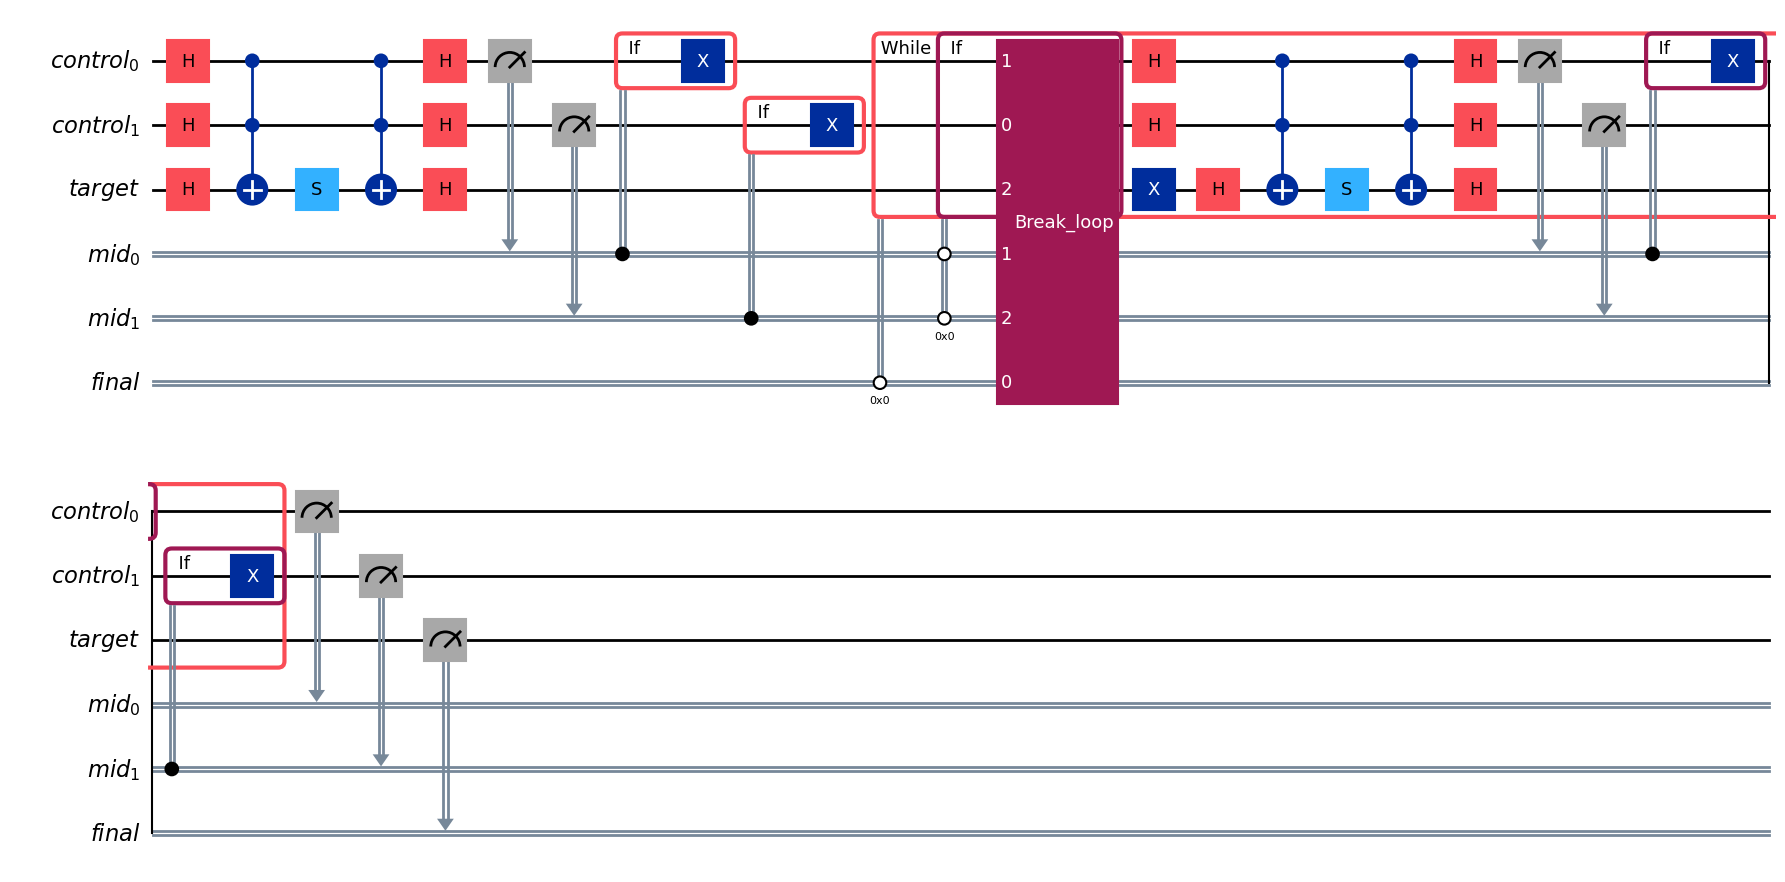

In [31]:
# Create a clean circuit with the same structure (bits, registers, etc) as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls are guaranteed to start in the |0> state.
trial(circuit)

reset_controls(circuit, mid_measure)
with circuit.while_loop(([final_measure, 0b0])): # Infinite loop
    ## Write your code below this line, making sure it's indented to where this comment begins from ## 
    with circuit.if_test((mid_measure, 0b00)):
        circuit.break_loop()
    circuit.x(target)
    trial(circuit)
    reset_controls(circuit, mid_measure)
    
    ## Do not change the code below this line ##

    
# We need to measure the control qubits again to ensure we get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're getting the rotation we desired.
circuit.measure(target, final_measure)

answer7 = circuit.copy()
circuit.draw("mpl", cregbundle=False)

In [32]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4g

grade_challenge4g(answer7, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


In [33]:
# initialize the backend and sampler
backend = AerSimulator()
sampler = Sampler(backend)

# Make a pub and execute our circuit
pub = (circuit)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.final.get_counts()

print(f"Counts: {counts_sampler}")

Counts: {'0': 7994, '1': 2006}


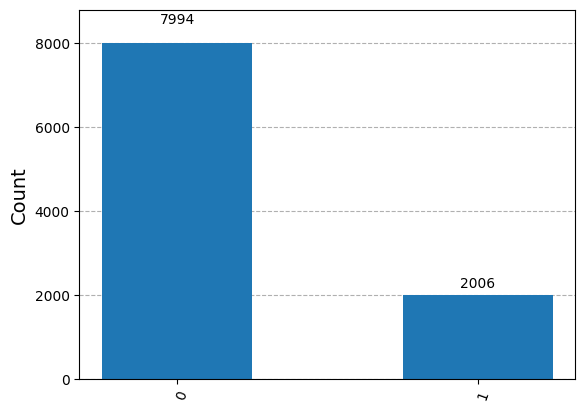

In [34]:
plot_histogram(counts_sampler)

Target qubitÏóê $\cos\theta = \frac35$Ïù∏ $R_X(\theta)$ Í≤åÏù¥Ìä∏Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Í∞ÄÌïòÎäîÎç∞ ÏÑ±Í≥µÌïòÏÖ®ÎÇòÏöî? Ï∂ïÌïòÎìúÎ¶ΩÎãàÎã§!

<div class="alert alert-block alert-success">

### Exercise 8: Result Analysis

ÏúÑÏóêÏÑú Ïó¨Îü¨Î∂ÑÏùÄ Target qubitÏóê $\cos\theta = \frac35$Ïù∏ $R_X(\theta)$ Í≤åÏù¥Ìä∏Î•º Í∞ÄÌïòÏÖ®ÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Ïó∞ÏÇ∞Ïù¥ Í∞ÄÌï¥Ï°åÏùÑ Îïå, Target qubitÎ•º Ï∏°Ï†ïÌïòÏòÄÏùÑ Îïå $|0\rangle$Ïù¥ Í¥ÄÏ∏°Îê† ÌôïÎ•†Í≥º $|1\rangle$Ïù¥ Í¥ÄÏ∏°Îê† ÌôïÎ•†ÏùÑ Íµ¨ÌïòÏÑ∏Ïöî.

**Ìï¥ÏïºÌï† Ïùº**: ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏùÑ Î≥¥ÏãúÎ©¥ ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏùò `answer8`ÏùÑ ÏÑ†Ïñ∏Ìï¥ ÎëêÏóàÏäµÎãàÎã§. Í∞ÅÍ∞ÅÏùò ÌÇ§Ïóê Ìï¥ÎãπÌïòÎäî Î∞∏Î•òÍ∞íÏúºÎ°ú Ìï¥Îãπ ÌÇ§ Í∞íÏù¥ Í¥ÄÏ∏°Îê† ÌôïÎ•†ÏùÑ ÎÑ£Ïñ¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.

</div>

<div class="alert alert-block alert-info">

$R_X(\theta)$ Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó∞ÏÇ∞Ïù¥ÎùºÍ≥† ÎßêÏîÄÎìúÎ†∏ÏóàÏäµÎãàÎã§.

$$R_X(\theta) = exp(-i\frac{\theta}{2}X) = \begin{bmatrix}\cos(\frac{\theta}{2})&-i\sin(\frac{\theta}{2})\\-i\sin(\frac{\theta}{2})&\cos(\frac{\theta}{2})\\ \end{bmatrix}$$

</div>

In [35]:
answer8 = {}

answer8['0'] = 4/5 ## add your code here
answer8['1'] = 1/5 ## add your code here

In [36]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge4h

grade_challenge4h(answer8, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


## Congratulations!

Ï∂ïÌïòÎìúÎ¶ΩÎãàÎã§! Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏùÄ QiskitÏúºÎ°ú classical feedforward and control flow ÌïòÎäî Î≤ïÏùÑ ÎßàÏä§ÌÑ∞ÌïòÏÖ®ÏäµÎãàÎã§! Îã§Î•∏ Ï±åÎ¶∞ÏßÄ Î¨∏Ï†úÎì§ÎèÑ ÌååÏù¥ÌåÖÏûÖÎãàÎã§!